# Descomposición de Valores Singulares (SVD) en Machine Learning

Al igual que PCA, se utiliza para reducir o comprimir la dimensionalidad de los datos, con la particularidad aquí de extraer sus características.

Complementando lo dicho por Federico con información de otras fuentes, como [Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition):

La descomposición en valores singulares es una **factorización** de una matriz real o compleja en una rotación, seguida por un reescalamiento seguido por otra rotación. Es una parte relevante del álgebra lineal.

**Fórmula base**

![FormulaSVD.png](./assets/SVD/FormulaSVD.png)

donde:

- **`A`** es la matriz original, real o compleja, de dimensiones `m x n`. La matriz `A` es también más comúnmente vista como `M` en otras fuentes. De cualquier manera, para efectos de este curso, será una matriz real que funcionará como entrada en el algoritmo SVD y que se descompondrá en 3 matrices diferentes: `U`, `∑` y `Vt`.
- **`U`** es una matriz real ortogonal de dimensiones `m x m` (cuadrada). Si `A` fuera compleja, esta será una matriz compleja unitaria.
- **`∑`** es una matriz diagonal rectangular de dimensiones `m x n` con números reales `R` no-negativos (desde `0` en adelante) en la diagonal.
- **`Vt`** es una matriz real ortogonal "traspuesta" de dimensiones `n x n` (cuadrada). Si `A` fuera compleja, esta será una matriz compleja unitaria y se le conocería como `V*`.

**Ejemplo de Federico**

![a.png](./assets/SVD/a.png)

![u.png](./assets/SVD/u.png)

![sigma.png](./assets/SVD/sigma.png)

![vt.png](./assets/SVD/vt.png)

**Ejemplo gráfico de la Wikipedia**

![512px-Singular-Value-Decomposition.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/512px-Singular-Value-Decomposition.svg.png)

**Visualización de la multiplicación de matrices en SVD**

![512px-Singular_value_decomposition_visualisation.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/512px-Singular_value_decomposition_visualisation.svg.png)

En la práctica del aprendizaje automático, SVD es una herramienta que, al igual que PCA, nos ayuda a **encontrar patrones subyacentes** en nuestros datos de manera no-supervisada, simplificando y destacando los hallazgos más relevantes.

In [1]:
# Para esto, sólo necesitamos a numpy!!
import numpy as np

In [2]:
# Definimos a A (también podría ser M, pero sigamos a Federico)
A: np.ndarray = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [3]:
# Declarar las matrices de salida
U, SIGMA, VT = np.linalg.svd(A)

In [4]:
U

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [5]:
SIGMA

array([9.52551809, 0.51430058])

In [6]:
VT

array([[-0.61962948, -0.78489445],
       [-0.78489445,  0.61962948]])

Matemáticamente hablando: that's all folks!!! 😂

Pero como estamos en machine learning y no en matemáticas crudas abstractas, más vale poner todo esto en contexto y generar visualizaciones para tener una mejor comprensión del asunto.

In [9]:
# Importemos bibliotecas necesarias para nuestro caso aplicado
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [10]:
iris = load_iris()

x = iris.data  # solo necesitamos la data, no el target!!

In [11]:
# x_standarized va a ser nuestra matriz A
x_standarized: np.ndarray = x - np.mean(x, axis=0)
x_standarized

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [12]:
u, sigma, vt = np.linalg.svd(x_standarized)

**NOTA DE FEDERICO**

La matriz _sigma_ es la que contiene los **valores singulares** que representan la **importancia de cada componente principal** en la descripción de la **variabilidad** de los datos.

Los **componentes principales** son **nuevas direcciones** en el espacio de los datos que **capturan la mayor variabilidad** posible.

In [23]:
k: int = 2

x_transformed = u[:, :k] * sigma[:k]  # reduce la dimensionalidad

La variable `k` (denominada así por convención) corresponde a la cantidad de componentes principales o dimensiones espaciales a representar (en este caso, un valor de `2` representa un espacio bidimensional para nuestras visualizaciones, tal y como en PCA).

Por su parte, `x_transformed` contiene los datos originales transformados para **adecuarlos al espacio de los componentes principales** que hemos declarado (en `k`).

- `u[:, :k]` es un array que selecciona las **primeras `k` columnas** de `u`, que corresponden a los **valores singulares izquierdos** asociados a los dos valores singulares más grandes. Esos valores singulares izquierdos **sirven para encontrar las dos mejores líneas que capturen la esencia** o la forma principal **de cómo se distribuyen nuestros puntos** en el espacio.

- `sigma[:k]` es un array que selecciona los **primeros `k` valores singulares** de `sigma`, que indican la **importancia** de cada uno de los dos componentes principales.

La multiplicación entre ambas variables, que se hace de elemento a elemento entre cada columna seleccionada de `u` y cada valor singular, sirve para escalar las columnas de `u` según la importancia de cada componente principal.

In [25]:
species: list[str] = ['Setosa', 'Versicolor', 'Virginica']

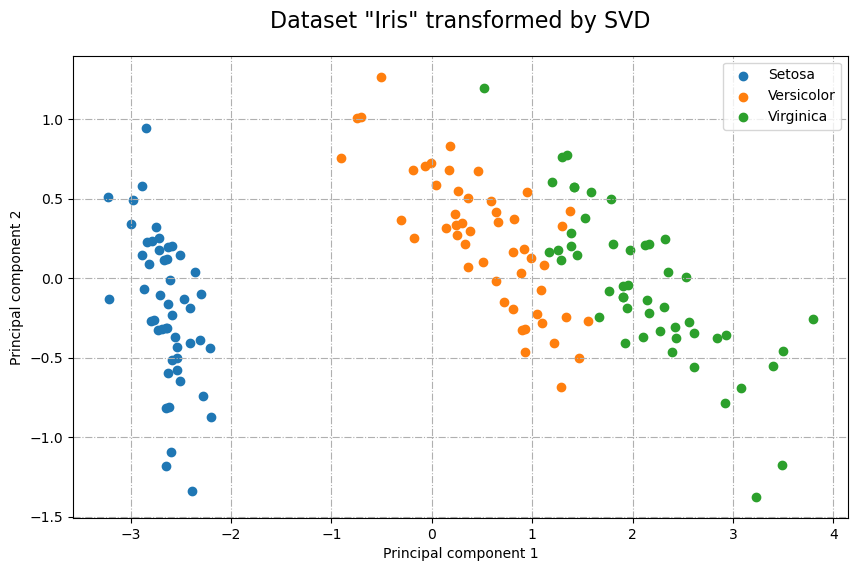

In [29]:
plt.figure(figsize=(10, 6))
for i in range(len(species)):
    first_column = x_transformed[iris.target == i, 0]
    second_column = x_transformed[iris.target == i, 1]
    plt.scatter(
        x=first_column,
        y=second_column,
        label=species[i]
    )
plt.title(
    'Dataset "Iris" transformed by SVD',
    fontsize=16,
    pad=20
)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.grid(True, linestyle='-.')
plt.legend()
plt.show()